In [53]:
# Import all the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pip install addcopyfighandler
#pip install matplotlib -- upgrade






In [54]:
wind_data = pd.read_csv('T2.csv')
#pd.set_option('precision', 2)
#wind_data.head()
print( wind_data.describe())


          WindSpeed  TheoreticalPower  WindDirection   ActivePower
count  50530.000000      50530.000000   50530.000000  50530.000000
mean       7.557952       1492.175463     123.687559   1307.684332
std        4.227166       1368.018238      93.443736   1312.459242
min        0.000000          0.000000       0.000000     -2.471405
25%        4.201395        161.328167      49.315437     50.677890
50%        7.104594       1063.776282      73.712978    825.838074
75%       10.300020       2964.972462     201.696720   2482.507568
max       25.206011       3600.000000     359.997589   3618.732910


In [55]:
wind_data.head()


,DateTime,WindSpeed,TheoreticalPower,WindDirection,ActivePower
0,01 01 2018 00:00,5.311336,416.328908,259.994904,380.047791
1,01 01 2018 00:10,5.672167,519.917511,268.641113,453.769196
2,01 01 2018 00:20,5.216037,390.900016,272.564789,306.376587
3,01 01 2018 00:30,5.659674,516.127569,271.258087,419.645904
4,01 01 2018 00:40,5.577941,491.702972,265.674286,380.650696


In [56]:
wind_data.drop(["DateTime"],axis=1,inplace=True)

In [57]:
wind_data.head()

,WindSpeed,TheoreticalPower,WindDirection,ActivePower
0,5.311336,416.328908,259.994904,380.047791
1,5.672167,519.917511,268.641113,453.769196
2,5.216037,390.900016,272.564789,306.376587
3,5.659674,516.127569,271.258087,419.645904
4,5.577941,491.702972,265.674286,380.650696


In [58]:
#plt.hist(wind_data["ActivePower"])

In [59]:
#plt.hist(wind_data["ActivePower"])
#plt.xlabel("ActivePower")
#plt.ylabel("Frequncy")

In [60]:
X = wind_data.iloc[:, :-1] #independent variables
y = wind_data.iloc[:,-1] #dependent variable


In [61]:
# CREATE TRAINING AND TESTING DATA SETS
from sklearn.model_selection import train_test_split
#help (train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,
                                                   random_state= None)

In [62]:
X_train.shape


(40424, 3)

In [63]:
y_train.shape

(40424,)

In [64]:
from sklearn.tree import DecisionTreeRegressor
#create decision tree regressor class
#reg = DecisionTreeRegressor(criterion="squared_error",max_depth=None,min_samples_split=10,random_state=None)
reg = DecisionTreeRegressor(criterion="squared_error",max_depth=10,min_samples_split=10,random_state=5)

In [65]:
# LINE OF BEST FIT
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [66]:
y_train_pred = reg.predict(X_train)
# y_pred is the testing data
y_pred =reg.predict(X_test)

In [67]:
print('y_pred = ',y_pred)
print('y_train_pred = ',y_train_pred )

y_pred =  [7.24235856e+02 2.38078304e+03 1.52199330e+03 ... 7.06369171e-03
 3.56570499e+03 1.20310962e+03]
y_train_pred =  [   4.25255696 1203.10961965  583.76036064 ...  420.69557414  396.41410522
  859.86018652]


In [68]:
# comparing the predicted with actual observed y values
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
meanAbsPercentageError = mean_absolute_percentage_error(y_test,y_pred)
MADE = mean_absolute_error(y_test,y_pred)

In [69]:
print('MSE Testing = ',mse)
print('MADE Testing = ', MADE)
print('RMSE Testing = ',np.sqrt(mse))

MSE Testing =  166608.37237114017
MADE Testing =  163.9511433386422
RMSE Testing =  408.17688858035575


In [70]:
# model validation
#from sklearn.model_selection import cross_val_score
#cross_val_score(reg,X_train,y_train,cv=10)

In [71]:
#help(cross_val_score)

In [72]:
# Metrics for training data set
mse_T = mean_squared_error(y_train,y_train_pred)
#meanAbsPercentageError_T = mean_absolute_percentage_error(y_train,y_pred)
MADE_T = mean_absolute_error(y_train,y_train_pred)

In [73]:
print('MSE Training = ',mse_T)
print('MADE training = ', MADE_T)
print('RMSE Training = ',np.sqrt(mse_T))

MSE Training =  119354.62530783724
MADE training =  140.20197825223283
RMSE Training =  345.4773875492248


C:\Users\pavpurcn\AppData\Local\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


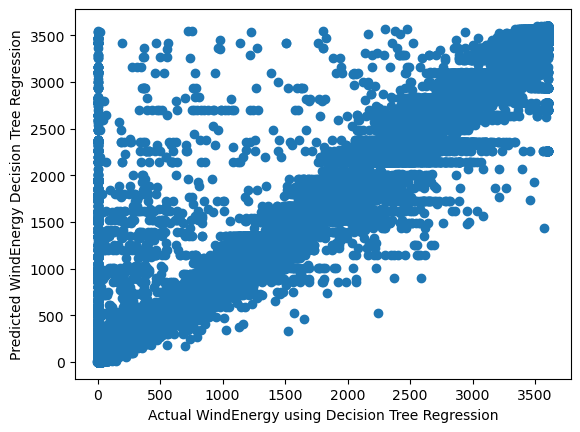

In [74]:
#how good is the prediction? on Training data set
import matplotlib.pyplot as plt
import matplotlib
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual WindEnergy using Decision Tree Regression")
plt.ylabel("Predicted WindEnergy Decision Tree Regression")
plt.show
print(matplotlib.matplotlib_fname())

<function matplotlib.pyplot.show(close=None, block=None)>

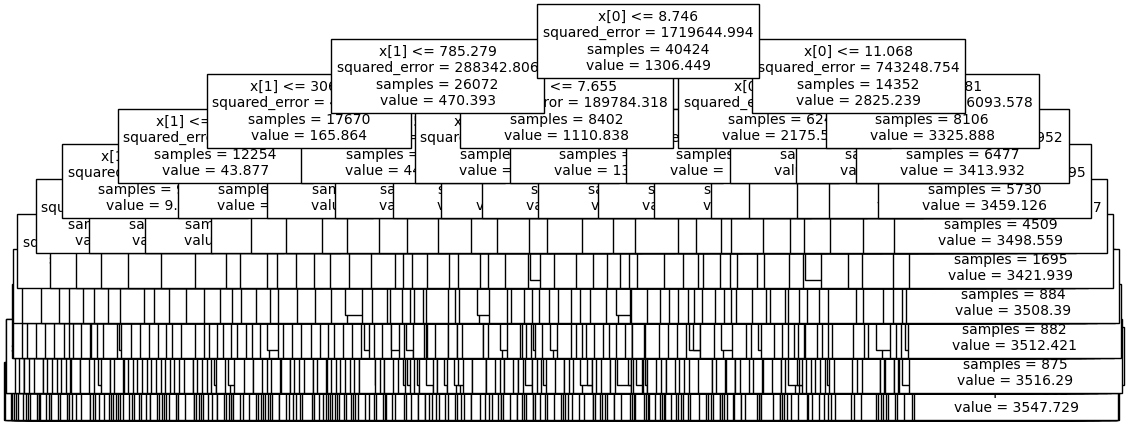

In [77]:
from sklearn.tree import plot_tree
plt.figure("Decision Tree",figsize=[12,5])
plot_tree(reg,fontsize =10)
plt.show

In [97]:
from sklearn.tree import export_graphviz
export_graphviz(reg,out_file='DTRBMP.BMP',feature_names=['WindSpeed', 'TheoreticalPower','WindDirection'])

C:\Users\pavpurcn\AppData\Local\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


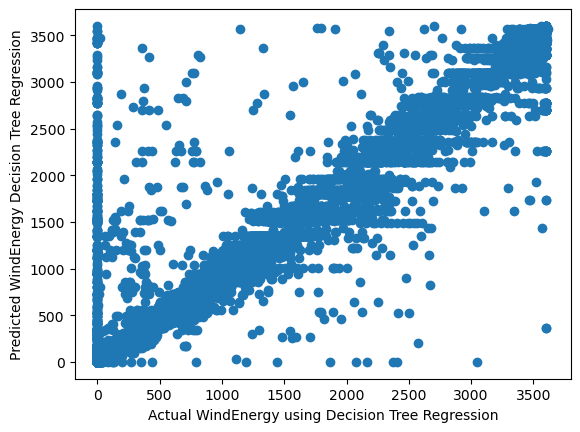

In [79]:
#how good is the prediction? on Testing data set
import matplotlib.pyplot as plt
import matplotlib
plt.scatter(y_test,y_pred)
plt.xlabel("Actual WindEnergy using Decision Tree Regression")
plt.ylabel("Predicted WindEnergy Decision Tree Regression")
plt.show
print(matplotlib.matplotlib_fname())

In [80]:
## /** Decision Tree REgression Ends ***/

In [81]:
###Linear Regression Starts####

In [82]:
# linear regression 
# Liner Regression START *****
import pandas as pd
wind_data_LReg = pd.read_csv('T2.csv')
#wind_data_LReg.head()

# drop DateTime column
wind_data_LReg.drop(["DateTime"],axis=1,inplace=True)
wind_data_LReg.head()


,WindSpeed,TheoreticalPower,WindDirection,ActivePower
0,5.311336,416.328908,259.994904,380.047791
1,5.672167,519.917511,268.641113,453.769196
2,5.216037,390.900016,272.564789,306.376587
3,5.659674,516.127569,271.258087,419.645904
4,5.577941,491.702972,265.674286,380.650696


In [83]:
#check for null rows
wind_data_LReg.isnull().sum()


WindSpeed           0
TheoreticalPower    0
WindDirection       0
ActivePower         0
dtype: int64

In [84]:
# Linear regression Y = m1x1 + m2x2 + m3x3 + c
#x1 = WindSpeed, x2 = TheoreticalPower x3 = WindDirection
# Assign independent variables to X_Lreg
X_LReg = wind_data_LReg.drop(columns = "ActivePower")

In [85]:
#Assign dependent variable to y
y_LReg = wind_data_LReg['ActivePower']

In [86]:
# split the data into training and testing 80%/20%
from sklearn.model_selection import train_test_split
X_train_LReg,X_test_LReg, y_train_LReg, Y_test_LReg = train_test_split(X_LReg,y_LReg,test_size=0.2,random_state=0) 

In [87]:
#fit into liner regression model 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_LReg, y_train_LReg) #Model is trained


LinearRegression()

In [88]:
#predict 
y_pred_train_LReg = lr.predict(X_train_LReg)
y_pred_LReg = lr.predict(X_test_LReg)

In [90]:
y_pred_train_LReg
print("Intercept: \n", lr.intercept_)
print("Coefficients: \n", lr.coef_)

Intercept: 
 -251.95882815383925
Coefficients: 
 [44.72139776  0.78371098  0.42264732]


<function matplotlib.pyplot.show(close=None, block=None)>

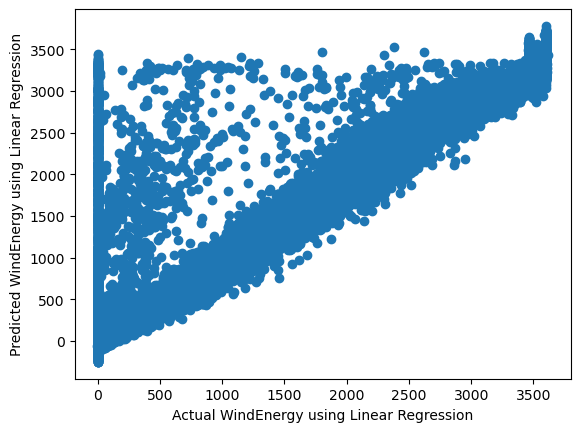

In [91]:
#how good is the prediction Linear Regression Training dataset?
import matplotlib.pyplot as plt
plt.scatter(y_train_LReg,y_pred_train_LReg)
plt.xlabel("Actual WindEnergy using Linear Regression")
plt.ylabel("Predicted WindEnergy using Linear Regression")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

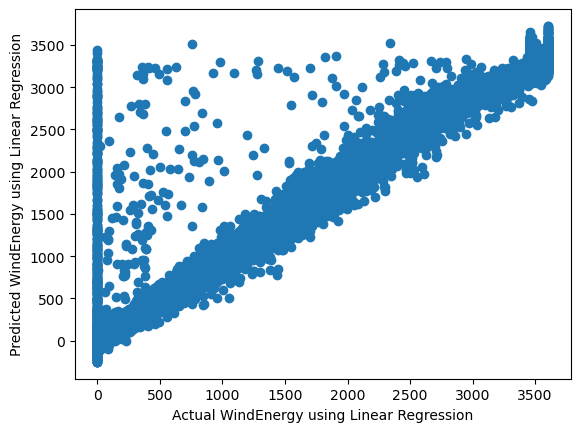

In [92]:
#how good is the prediction Linear Regression Test dataset?
import matplotlib.pyplot as plt
plt.scatter(Y_test_LReg,y_pred_LReg)
plt.xlabel("Actual WindEnergy using Linear Regression")
plt.ylabel("Predicted WindEnergy using Linear Regression")
plt.show

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
mse_LReg = mean_squared_error(Y_test_LReg,y_pred_LReg)
meanAbsPercentageError_LReg = mean_absolute_percentage_error(Y_test_LReg,y_pred_LReg)
MADE_LR = mean_absolute_error(Y_test_LReg,y_pred_LReg)

In [94]:
mse_LReg

163820.11870985117

In [141]:
print('MSE Linear Regression Testing = ', mse_LReg)
print('RMSE Linear Regression Testing = ', np.sqrt(mse_LReg))
print('MADE Linear Regression Testing = ', MADE_LR)


MSE Linear Regression Testing =  163820.11870985117
RMSE Linear Regression Testing =  404.7469811003551
MADE Linear Regression Testing =  186.2110779756388


In [145]:
# Performance statistics for training data set

mse_LReg_T = mean_squared_error(y_train_LReg,y_pred_train_LReg )
#meanAbsPercentageError_LReg = mean_absolute_percentage_error(Y_test_LReg,y_pred_LReg)
MADE_LR_T = mean_absolute_error(y_train_LReg,y_pred_train_LReg)

In [146]:
print('MSE Linear Regression Training = ', mse_LReg_T)
print('RMSE Linear Regression Training = ', np.sqrt(mse_LReg_T))
print('MADE Linear Regression Training = ', MADE_LR_T)


MSE Linear Regression Training =  162490.04765420346
RMSE Linear Regression Training =  403.10054286021926
MADE Linear Regression Training =  184.78784160769507
